# EDA for Prices Dataset

Initial look at data and data cleaning


## Import necassary libraries

In [ ]:
# Import necassary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats

In [ ]:
#Load dataset
df_prices = pd.read_csv('../data/prices_20210713.csv')

In [ ]:
df_prices.head()

## Correcting date and time formatting.

In [ ]:
df_prices['date_from'] = pd.to_datetime(df_prices['date_from'], errors = 'coerce')
df_prices['date_to'] = pd.to_datetime(df_prices['date_to'], errors = 'coerce')


In [ ]:
df_prices.query('price_per_day_from <= 3') 

In [ ]:
df_prices

In [ ]:
df_prices.head()

In [ ]:
df_prices.describe().round()

In [ ]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

## Clean 95th quantile

In [ ]:
# Calculate .95 quantile for numerical features
print('Quantiles 0.95 for:')
print('days:', df_prices.price_per_day_from.quantile([.95]))
print('weeks:', df_prices.price_per_week_from.quantile([.95]))

In [ ]:
# Get names of indexes for which column filled_in_price_per_day has value higher than the 95 quintile.
indexNames = df_prices[df_prices['price_per_day_from'] > 220 ].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

# Get names of indexes for which column price_per_week_from has value higher than the 95 quintile.
indexNames = df_prices[df_prices['price_per_week_from'] >  1379].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

## Translating "price per day" to "price per week", and visa versa.

In [ ]:
df_prices['filled_in_price_per_day']= df_prices.price_per_day_from.fillna(
    (df_prices.price_per_week_from)/7) 
df_prices['filled_in_price_per_week'] = df_prices.price_per_week_from.fillna(
    (df_prices.price_per_day_from)*7) 
df_prices.head()

## Checking work

In [ ]:

df_prices['price_per_week_from'].isna().value_counts()

In [ ]:
df_prices['filled_in_price_per_week'].isna().value_counts()

Not Nan should be reduced but still exist when there was not price set in either column.

## Validating whether 999 and 9999 are real values

In [ ]:
df_prices['filled_in_price_per_day'].isna().value_counts()

In [ ]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [ ]:
df_prices.query('filled_in_price_per_day == 9999 or filled_in_price_per_day == 999') 

In [ ]:
df_prices.query('filled_in_price_per_day == 9999 or filled_in_price_per_day == 999').count()

In [ ]:
smf.ols(formula='price_per_week_from ~ price_per_day_from', data=df_prices).fit().summary()

As only 21 entries were 999 or 9999 was only in the weeks column, we have determined that 999 and 9999 are common placeholder values in this data set. 

## Checking that there are not an abundance of placeholder values (i.e. 0 or 1).

In [ ]:
df_prices.query('filled_in_price_per_day == 1234').count()

## Replacing all values of 0, 1, 999, and 9999.

In [ ]:
df_prices['filled_in_price_per_day']= df_prices.filled_in_price_per_day.replace(
    [0, 1, 999, 9999], [np.NaN, np.NaN, np.NaN, np.NaN])
df_prices['filled_in_price_per_week']= df_prices.filled_in_price_per_week.replace(
    [0, 1, 999, 9999], [np.NaN, np.NaN, np.NaN, np.NaN])

## Searching for nonsense prices

In [ ]:
bad_data = df_prices.filled_in_price_per_day >= df_prices.filled_in_price_per_week
bad_data.value_counts()

In [ ]:
df_prices.query('filled_in_price_per_day >= 5000')

In [ ]:
df_prices.head()

## Deleting bad data

In [ ]:
# Get names of indexes for which column filled_in_price_per_day has value greater than or equal to filled_in_price_per_week
indexNames2 = df_prices[df_prices['filled_in_price_per_day'] >= df_prices['filled_in_price_per_week']].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames2 , inplace=True)

In [ ]:
# Get names of indexes for which column filled_in_price_per_week over 1_000_000
indexNames = df_prices[df_prices['filled_in_price_per_week'] >= 140_000 ].index
# Delete these row indexes from dataFrame
df_prices.drop(indexNames , inplace=True)

In [ ]:
df_prices.head()

## Checking high values

In [ ]:
df_prices.query('filled_in_price_per_day >= 5000')

## Looking at date information

In [ ]:
pd.to_datetime(df_prices.date_from)

<AxesSubplot:xlabel='date_from', ylabel='filled_in_price_per_day'>

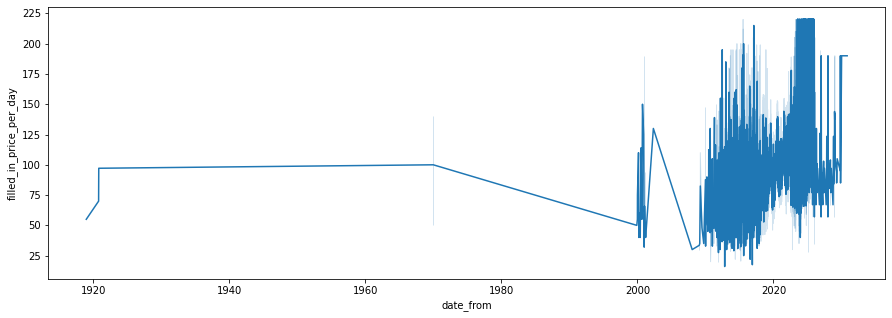

In [30]:
df_prices['month'] = pd.to_datetime(df_prices['date_from']).dt.to_period('M')
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=df_prices, x="date_from", y="filled_in_price_per_day")

## Checking correlation between weeks and days

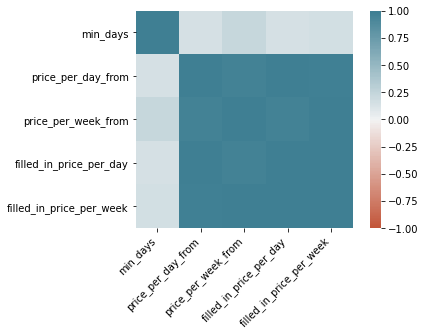

In [31]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap
corr = df_prices.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [32]:
corr

,min_days,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
min_days,1.000000,0.156166,0.233976,0.155889,0.170426
price_per_day_from,0.156166,1.000000,0.958667,1.000000,0.984161
price_per_week_from,0.233976,0.958667,1.000000,0.962087,1.000000
filled_in_price_per_day,0.155889,1.000000,0.962087,1.000000,0.984648
filled_in_price_per_week,0.170426,0.984161,1.000000,0.984648,1.000000


Text(0.5, 1.0, 'Price contrast between week and day')

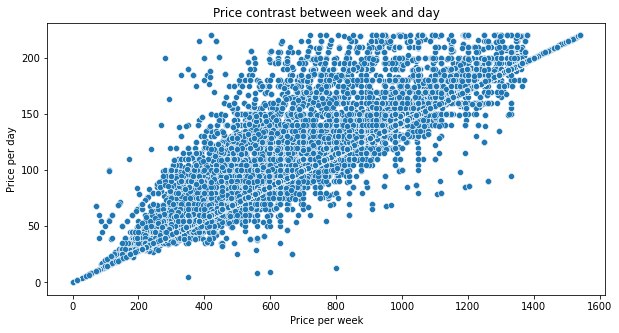

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x=df_prices.filled_in_price_per_week, y=df_prices.filled_in_price_per_day)
ax.set(xlabel='Price per week', ylabel='Price per day')
plt.title('Price contrast between week and day')

In [34]:
df_prices.describe()

,min_days,price_per_day_from,price_per_week_from,filled_in_price_per_day,filled_in_price_per_week
count,468664.000000,449172.000000,224627.000000,466126.000000,466085.000000
mean,4.203079,91.395314,584.869840,91.532907,631.464858
std,2.123518,39.766328,241.790781,39.676546,274.183614
min,1.000000,0.000000,0.000000,0.010000,0.070000
25%,3.000000,61.000000,413.000000,62.000000,420.000000
50%,4.000000,80.000000,525.000000,80.000000,560.000000
75%,6.000000,113.000000,700.000000,114.000000,770.000000
max,28.000000,220.000000,1379.000000,220.000000,1540.000000


In [35]:
df_prices.median()

/var/folders/f3/z2tpzycd57bfz6359zgkz9f00000gn/T/ipykernel_52619/3474912872.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_prices.median()


min_days                        4.0
price_per_day_from             80.0
price_per_week_from           525.0
filled_in_price_per_day        80.0
filled_in_price_per_week      560.0
month                       2020-09
dtype: object

In [36]:
df_prices.filled_in_price_per_week.max()

1540.0

## Creating price_catagory column

In [37]:
def catagorizer(a, b):
    if np.isnan(a):
        if np.isnan(b):
            return "No_info"
        else:
            return "Week"
    else:
        if np.isnan(b):
            return "Day"
    return "Both"


In [38]:

df_prices['price_catagory']= df_prices.apply(lambda x: catagorizer(
    x['price_per_day_from'], x['price_per_week_from']), axis=1)

In [ ]:
df_prices['price_catagory'].unique()

In [ ]:
df_prices['price_catagory'].value_counts()

In [ ]:
df_prices[df_prices['price_catagory'] == "No_info"]

## Deleting price_per_day_from and price_per_week_from

In [ ]:
del df_prices['price_per_day_from']

In [ ]:
del df_prices['price_per_week_from']

In [ ]:
df_prices.head()

## Saving to CSV

In [ ]:
df_prices.to_csv('../data/prices_dataset.csv')